# Short introduction to `numpy`

In [1]:
import numpy as np

## 1. Motivations

**Why `numpy`?** Because it's very well optimized (and then fast) for numerical computations in python

**Why python?** Many tools available


## 2. The core object: arrays

### 2.1 Main differences with usual python lists

Addition of lists/arrays and multiplication by a number:

In [2]:
# Python list and numpy arrays to play with
l1, l2 = [1, 2, 3], [3, 4, 5]
a1, a2 = np.array([1, 2, 3]), np.array([3, 4, 5])


# helper function to print title
def print_title(title):
    print('-'*len(title))
    print(title)
    print('-'*len(title))
    

print_title('obj1+obj2')
print('  python lists: {}'.format(l1+l2))
print('  numpy arrays: {}'.format(a1+a2))
print('\n')
print_title('obj*2')
print('  python list: {}'.format(l1*2))
print('  numpy array: {}'.format(a1*2))

---------
obj1+obj2
---------
  python lists: [1, 2, 3, 3, 4, 5]
  numpy arrays: [4 6 8]


-----
obj*2
-----
  python list: [1, 2, 3, 1, 2, 3]
  numpy array: [2 4 6]


Slicing and indexing:

In [3]:
print_title('Indexing with an integer: obj[1]')
print('  python list: {}'.format(l1[1]))
print('  numpy array: {}'.format(a1[1]))
print('\n')

print_title('Indexing with a slicing: obj[slice(1,3))]')
print('  python list: {}'.format(l1[slice(1,3)]))
print('  numpy array: {}'.format(l1[slice(1,3)]))
print('\n')

print_title('Indexing with a list of integers: obj[[0,2]]')
print('  python list: IMPOSSIBLE')
print('  numpy array: {}'.format(a1[[0,2]]))

--------------------------------
Indexing with an integer: obj[1]
--------------------------------
  python list: 2
  numpy array: 2


-----------------------------------------
Indexing with a slicing: obj[slice(1,3))]
-----------------------------------------
  python list: [2, 3]
  numpy array: [2, 3]


--------------------------------------------
Indexing with a list of integers: obj[[0,2]]
--------------------------------------------
  python list: IMPOSSIBLE
  numpy array: [1 3]


### 2.2 Main caracteristics of a `np.array`

  + `a.dtype`: type of data contained in the array
  + `a.shape`: number of elements along each dimension
  + `a.size`: total number of elements
  + `a.ndim`: number of dimensions

In [4]:
a = np.array([[ 0,  1,  2,  3],
              [ 4,  5,  6,  7],
              [ 8,  9, 10, 11]])

print('a.dtype = {}'.format(a.dtype))
print('a.shape = {}'.format(a.shape))
print('a.size  = {}'.format(a.size))
print('a.ndim  = {}'.format(a.ndim))

a.dtype = int64
a.shape = (3, 4)
a.size  = 12
a.ndim  = 2


## 3. The three key features of `numpy`

### 3.1 Vectorization

The *Vectorization* is a way to make computations on numpy array **without explicit loops**, which are very slow in python. The idea of vectorization is to compute a given operation *element-wise* while the operation is called on the array itself. An example is given below to compute the inverse of 100000 numbers, both with explicit loop and vectorization.

In [5]:
a = np.random.randint(low=1, high=100, size=100000)

def explicit_loop_for_inverse(a):
    inv_a = []
    for element in a:
        inv_a.append(1./element)
    return np.array(inv_a)

In [6]:
# Using explicit loop
%timeit explicit_loop_for_inverse(a)

182 ms ± 8.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# Using vectorization
%timeit 1.0/a

119 µs ± 7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Many standard functions are implemented in a vectorized way, they are call the *universal functions*, or `ufunc`. Few examples are given below but the full description can be found in [numpy documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

In [8]:
a = np.random.randint(low=1, high=100, size=3)
print('a        : {}'.format(a))
print('a^2      : {}'.format(a**2))
print('a/(1-a^a): {}'.format(a/(1-a**a)))
print('cos(a)   : {}'.format(np.cos(a)))
print('exp(a)   : {}'.format(np.exp(a)))

a        : [20 22 97]
a^2      : [ 400  484 9409]
a/(1-a^a): [ 9.51729109e-18 -4.41611606e-18 -2.11167384e-17]
cos(a)   : [ 0.40808206 -0.99996083 -0.92514754]
exp(a)   : [4.85165195e+08 3.58491285e+09 1.33833472e+42]


All these ufunct can work for n-dimension arrays and can be used in a very flexible way depeding on the axis you are refering too. Indeed the mathematical operation can be performed over a different axis of the array, having a totally different meaning. Let's give a simple concrete example with a 2D array of shape (5,2), *i.e.* 5 vectors of three coordinates $(x,y,z)$  Much more examples will be discussed in the section 2.

In [9]:
# Generate 5 vectors (x,y,z)
positions = np.random.randint(low=1, high=100, size=(5, 3))

# Average of the coordinate over the 5 observations
pos_mean = np.mean(positions, axis=0)
print(pos_mean)

# Distance to the origin sqrt(x^2+ y^2 + z^2)for the 5 observations
distances = np.sqrt(np.sum(positions**2, axis=1))
print(distances)

[26.8 28.  53.8]
[80.0187478  34.84250278 76.223356   92.02173656 80.46117076]


### 3.2 Broadcasting

The *broadcasting* is a way to compute operation between arrays of having different sizes in a implicit (and consice) manner. Few examples are given below but more details are give in [this documentation](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html).

In [10]:
# operation between shape (3) and (1)
a = np.array([1, 2, 3])
b = np.array([5])
a+b

array([6, 7, 8])

In [11]:
# operation between shape (3) and (1,2)
a = np.array([1, 2, 3])
b = np.array([
              [4],
              [5],
             ])
a+b

array([[5, 6, 7],
       [6, 7, 8]])

In [12]:
# Operation between shapes (5,3) and (3), e.g. adding an origin r0 to 10 2D vectors
data = np.random.normal(size=(5, 2))
r0 = np.array([1, 4])
print('data:\n {}\n'.format(data))
print('data+r0:\n {}'.format(data+r0))

data:
 [[-0.83445393  0.02910809]
 [ 0.02330676 -0.50669058]
 [-0.28056214  0.39338785]
 [-0.73887014 -0.36958986]
 [-0.07166201  0.58934623]]

data+r0:
 [[0.16554607 4.02910809]
 [1.02330676 3.49330942]
 [0.71943786 4.39338785]
 [0.26112986 3.63041014]
 [0.92833799 4.58934623]]


### 3.3 Working with sub-arrays: slicing, indexing and mask (or selection)

*Slicing and indexing* are ways to access sub-arrays in a smart way. Python allows slicing with `Slice()` object but `numpy` allows to push it much further with fancy indexing. Few examples are given below and for more details, please have a look to [this documentation page](https://docs.scipy.org/doc/numpy-1.15.1/reference/arrays.indexing.html).

The basic synthax is `a[i]` to access the ith element. It is also possible to go from the last element using negative indices: `a[-1]` is the last element. Numpy also support array of indices. If the index array is multi-dimensional, the result will have the same dimension as the indices array.

In [13]:
a = np.random.randint(low=1, high=100, size=10)
print('a = {}'.format(a))
print('a[2] = {}'.format(a[2]))
print('a[-1] = {}'.format(a[-1]))
print('a[[1, 2, 5]] = {}'.format(a[[1, 2, 5]]))

a = [61 75 74 99 36 79  1 62 31  1]
a[2] = 74
a[-1] = 1
a[[1, 2, 5]] = [75 74 79]


In [14]:
# Playing with a small n-dimensional indices array: 5 arrays of 2 elements each
indices = np.arange(10).reshape(5,2)
print('indices = {}'.format(indices))
print('a[indices] = {}'.format(a[indices]))
print('\n')

# Playing with n-dimensional indices array: 2 arrays of (10, 10) arrays
indices_big = np.random.randint(low=0, high=10, size=(2, 10, 10))
print('indices_big = {}'.format(indices_big))
print('a[indices_big] = {}'.format(a[indices_big]))

indices = [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
a[indices] = [[61 75]
 [74 99]
 [36 79]
 [ 1 62]
 [31  1]]


indices_big = [[[0 6 6 6 3 6 2 1 2 2]
  [2 0 4 3 6 4 2 8 8 2]
  [8 0 6 9 5 1 9 0 7 1]
  [9 3 4 2 9 6 1 4 0 5]
  [8 0 5 8 8 2 7 3 9 2]
  [0 4 4 3 5 7 4 7 3 7]
  [3 9 5 3 3 2 6 8 4 2]
  [8 9 3 2 1 3 0 2 2 0]
  [1 2 4 4 7 1 4 8 9 9]
  [3 5 4 0 6 6 4 4 3 5]]

 [[2 7 2 3 3 3 2 2 0 2]
  [8 0 9 3 8 3 0 1 4 6]
  [6 8 7 5 9 7 9 6 4 2]
  [4 2 4 9 4 4 4 4 4 6]
  [9 0 2 2 4 5 7 9 6 3]
  [1 8 0 6 9 3 3 4 4 5]
  [8 1 1 3 1 3 8 9 2 3]
  [4 9 1 5 7 1 0 8 0 9]
  [8 3 2 1 0 1 5 6 7 1]
  [3 0 4 7 1 1 0 6 3 4]]]
a[indices_big] = [[[61  1  1  1 99  1 74 75 74 74]
  [74 61 36 99  1 36 74 31 31 74]
  [31 61  1  1 79 75  1 61 62 75]
  [ 1 99 36 74  1  1 75 36 61 79]
  [31 61 79 31 31 74 62 99  1 74]
  [61 36 36 99 79 62 36 62 99 62]
  [99  1 79 99 99 74  1 31 36 74]
  [31  1 99 74 75 99 61 74 74 61]
  [75 74 36 36 62 75 36 31  1  1]
  [99 79 36 61  1  1 36 36 99 79]]

 [[74 62 74 99 99 99 74 74 61 74]
  

There is a quite powerful smart way to access sub-array with the synthax `a[min:max:step]`. In that way, it's very easy to take one element over two (`step=2`), or reverse the order of the array (`step=-1`). This synthax works also for n-dimensional array, where each dimension is sperated by a coma. An example is given for a 1D array and for a 3D array of (5, 2, 3) shapes (that can though of 5 observations containing each 2 3D vectors).

In [15]:
a = np.random.randint(low=1, high=100, size=10)
print('full array a              = {}'.format(a))
print('from 0 to 1: a[:2]        = {}'.format(a[:2]))
print('from 4 to end: a[4:]      = {}'.format(a[4:]))
print('reverse order: a[::-1]    = {}'.format(a[::-1]))
print('all even elements: a[::2] = {}'.format(a[::2]))

full array a              = [37 47 59 66 98 41 50  5 53 26]
from 0 to 1: a[:2]        = [37 47]
from 4 to end: a[4:]      = [98 41 50  5 53 26]
reverse order: a[::-1]    = [26 53  5 50 41 98 66 59 47 37]
all even elements: a[::2] = [37 59 98 50 53]


In [16]:
a = np.random.randint(low=0, high=100, size=(5, 2, 3))
print('a = {}'.format(a))

# Taking only the y,z values of the first vector for all observation
#  - first dimension (=5 observations): `:` means takes all
#  - second dimension (=2 vectors): `1` means only the 2nd element
#  - third dimensio (=3 coordinates): `0:2` means from 0 to 2-1, so only (x,y)
print('\nTaking only the y,z values of the first vector for all observation:')
print('a[:, 0, 0:2] = {}'.format(a[:, 0, 0:2]))

print('\nReverse the order of the 2 vector for each observation:')
print('a[:, ::-1, :] = {}'.format(a[:, ::-1, :]))

a = [[[31 34 57]
  [82 45 53]]

 [[98  9 31]
  [89 81  2]]

 [[61 51 33]
  [96 36 70]]

 [[53 48 90]
  [81 91 48]]

 [[86 85 97]
  [93 21 60]]]

Taking only the y,z values of the first vector for all observation:
a[:, 0, 0:2] = [[31 34]
 [98  9]
 [61 51]
 [53 48]
 [86 85]]

Reverse the order of the 2 vector for each observation:
a[:, ::-1, :] = [[[82 45 53]
  [31 34 57]]

 [[89 81  2]
  [98  9 31]]

 [[96 36 70]
  [61 51 33]]

 [[81 91 48]
  [53 48 90]]

 [[93 21 60]
  [86 85 97]]]


The last part of of indexing is about array *masking* or *selection*. This allows to get only element based on a give criteria, exploiting the indexing technics shown above. Indeed, a condition an array such as `a>0` will directly return an array of boolean for which each element is `True` or `False` depending on the condition. This is also very useful to replace all element with a given value. Some examples are given below.

In [17]:
a = np.random.randint(low=-100, high=100, size=(5, 3))
mask = a>0
print('a        = {}'.format(a))
print('mask     = {}'.format(mask))
print('a[mask]  = {}'.format(a[mask]))  # this cannot keep the dimension, by construction
print('a*mask   = {}'.format(a*mask))   # this preserve the dimension (replacing False by 0)
print('a[~mask] = {}'.format(a[~mask])) # The symbol ~make reverse the conditions
print('a*~mask  = {}'.format(a*~mask))  # which work for a produc too.

a        = [[ 64 -82 -26]
 [ 37 -75 -66]
 [-97 -41  56]
 [ 48 -79  92]
 [ 51  90 -88]]
mask     = [[ True False False]
 [ True False False]
 [False False  True]
 [ True False  True]
 [ True  True False]]
a[mask]  = [64 37 56 48 92 51 90]
a*mask   = [[64  0  0]
 [37  0  0]
 [ 0  0 56]
 [48  0 92]
 [51 90  0]]
a[~mask] = [-82 -26 -75 -66 -97 -41 -79 -88]
a*~mask  = [[  0 -82 -26]
 [  0 -75 -66]
 [-97 -41   0]
 [  0 -79   0]
 [  0   0 -88]]


In [18]:
# Replacement of all negative values by their square
a = np.random.randint(low=-100, high=100, size=(5, 3))
print('Before: a={}'.format(a))

a[a<0] = a[a<0]**2
print('\nAfter: a={}'.format(a))

Before: a=[[ 37 -54 -87]
 [ 12  -5 -30]
 [-89 -19 -81]
 [ 56  48  12]
 [ 78  37 -93]]

After: a=[[  37 2916 7569]
 [  12   25  900]
 [7921  361 6561]
 [  56   48   12]
 [  78   37 8649]]


## 4. A powerfull plotting tool: `matplotlib`

`matplolib` is an extremely rich pacakge for data visualization and there is no way to cover all its features here. The goal of this section is just to give you short and practical example to plot data. Much more details can be obtained on the [webpage](https://matplotlib.org/index.html).

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

### 4.1 Example of 1D plots and histograms

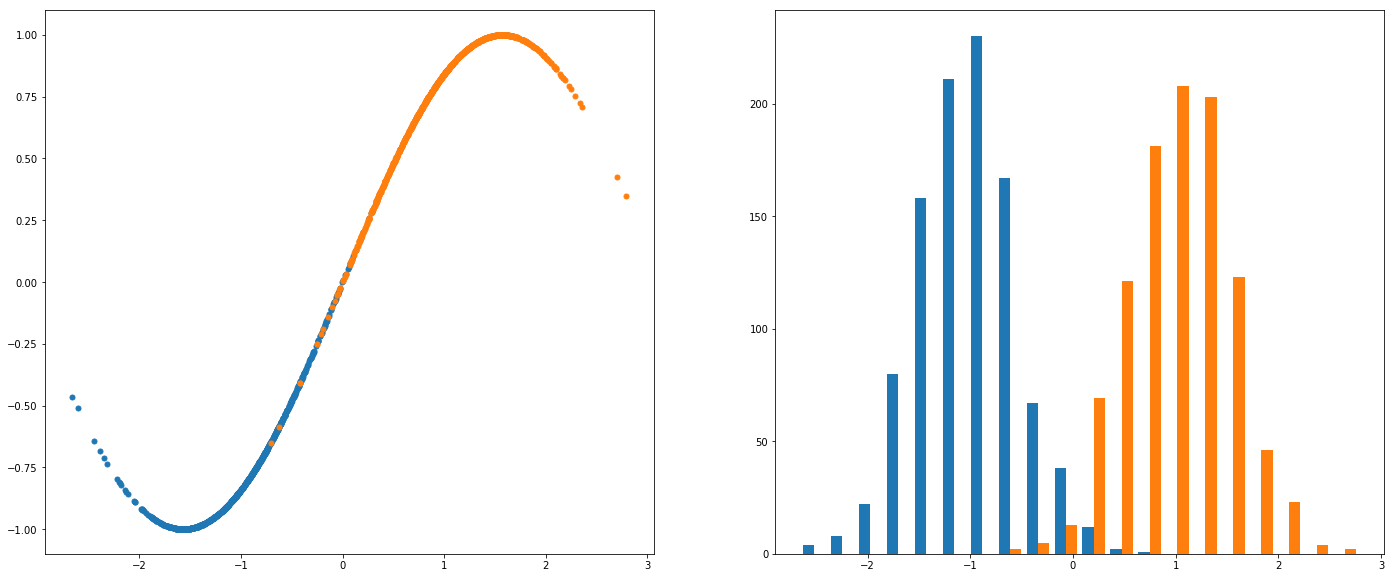

In [20]:
# Data generation
x = np.random.normal(loc=[-1, 1], scale=[0.5, 0.5], size=(1000,2))
y = np.sin(x)

# Figure creation
fig = plt.figure(figsize=(24, 10))

# First subplot (1 line, 2 column, 1st plot)
plt.subplot(121)
ax = plt.plot(x, y, marker='o', markersize=5, linewidth=0.0)

# Second subplot (1 line, 2 column, 2nd plot)
plt.subplot(122)
ax = plt.hist(x, bins=20) # x.shape = (1000, 2), interpreted as 2 histos of 1000 entries

### 4.2 Example of 2D scatter plot

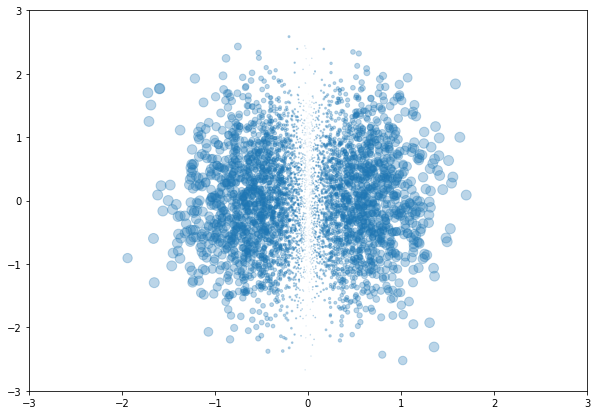

In [21]:
# Data generation
points = np.random.normal(loc=[0, 0.0], scale=[0.5, 0.8], size=(5000,2))

# plotting 2D points (x, y) with a circle size of 100*sin(x)^2
x, y = points[:, 0], points[:, 1]
fig = plt.figure(figsize=(10,7))
ax = plt.scatter(x, y, s=100*(np.sin(x))**2, marker='o', alpha=0.3)
ax = plt.xlim(-3, 3)
ax = plt.ylim(-3, 3)

### 4.3 Example of 3D plots

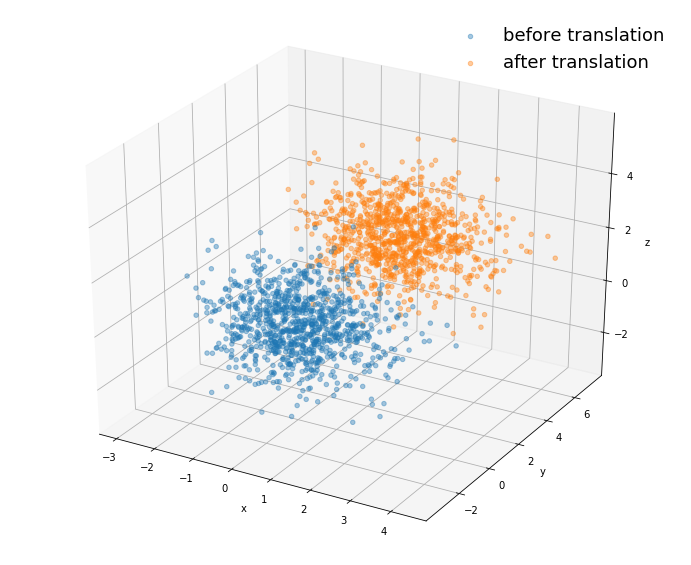

In [22]:
# Making 3D positions and translate them using broadcasting
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 2])
data_trans = data + r0

# import the needed extension to plot in 3D
from mpl_toolkits import mplot3d

# Plotting the data before and after translation
fi = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
_ = ax.scatter3D(data[:,0], data[:,1], data[:,2], alpha=0.4, label='before translation')
_ = ax.scatter(data_trans[:,0], data_trans[:,1], data_trans[:,2], alpha=0.4, label='after translation')
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('y')
_ = ax.set_zlabel('z')
_ = ax.legend(frameon=False, fontsize=18)

## 5. Import and manipulate data as `numpy` array via `pandas`

The package `pandas` is an very rich interface to read data from different format and produce a `pandas.dataframe` that can be based on `numpy` (but contanining a lot more features). There is no way to fully desribe this package here, the goal is simply to give functional and concrete example easily usable. More more details, please check the [pandas webpage](https://pandas.pydata.org/)

In [23]:
import pandas as pd
cols_to_keep = ['HT', 'nlep', 'njet', 'pt_1st_bjet', 'pt_2nd_bjet', 'pt_3rd_bjet', 'pt_4th_bjet']
df = pd.read_csv('ttW.csv', usecols=cols_to_keep)
df.head()

,HT,njet,nlep,pt_1st_bjet,pt_2nd_bjet,pt_3rd_bjet,pt_4th_bjet
0,262.100311,2,2,48.112684,-99.000000,-99.0,-99.0
1,447.937225,4,4,118.460391,28.788586,-99.0,-99.0
2,1287.348022,6,6,89.715039,42.138535,-99.0,-99.0
3,453.677887,6,6,88.535555,82.532266,-99.0,-99.0
4,268.445099,2,2,116.625023,-99.000000,-99.0,-99.0


In [27]:
# Get a numpy arrays
ht = df['HT'].values

# Get derived quantities
ht_mean = np.mean(ht)
ht_rms = np.sqrt(np.mean((ht-ht_mean)**2))
print(ht_mean, ht_rms)

# Add them into the pandas dataframe
df['HT_centered'] = ht-ht_mean
df['HT_normalized'] = (ht-ht_mean)/ht_rms
df.head()

516.9268958819778 284.43030266476273


,HT,njet,nlep,pt_1st_bjet,pt_2nd_bjet,pt_3rd_bjet,pt_4th_bjet,HT_centered,HT_normalized
0,262.100311,2,2,48.112684,-99.000000,-99.0,-99.0,-254.826585,-0.895919
1,447.937225,4,4,118.460391,28.788586,-99.0,-99.0,-68.989671,-0.242554
2,1287.348022,6,6,89.715039,42.138535,-99.0,-99.0,770.421127,2.708646
3,453.677887,6,6,88.535555,82.532266,-99.0,-99.0,-63.249009,-0.222371
4,268.445099,2,2,116.625023,-99.000000,-99.0,-99.0,-248.481797,-0.873612


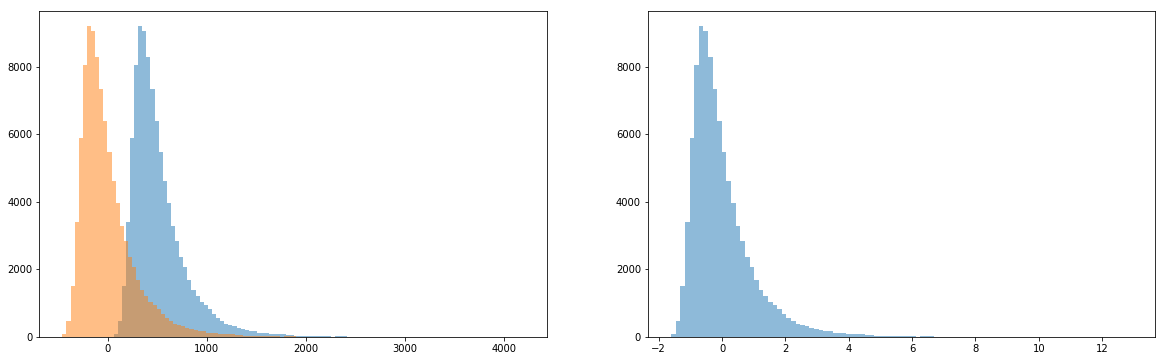

In [28]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
ax = plt.hist(df['HT'], bins=100, alpha=0.5)
ax = plt.hist(df['HT_centered'], bins=100, alpha=0.5)

plt.subplot(122)
ax = plt.hist(df['HT_normalized'], bins=100, alpha=0.5)

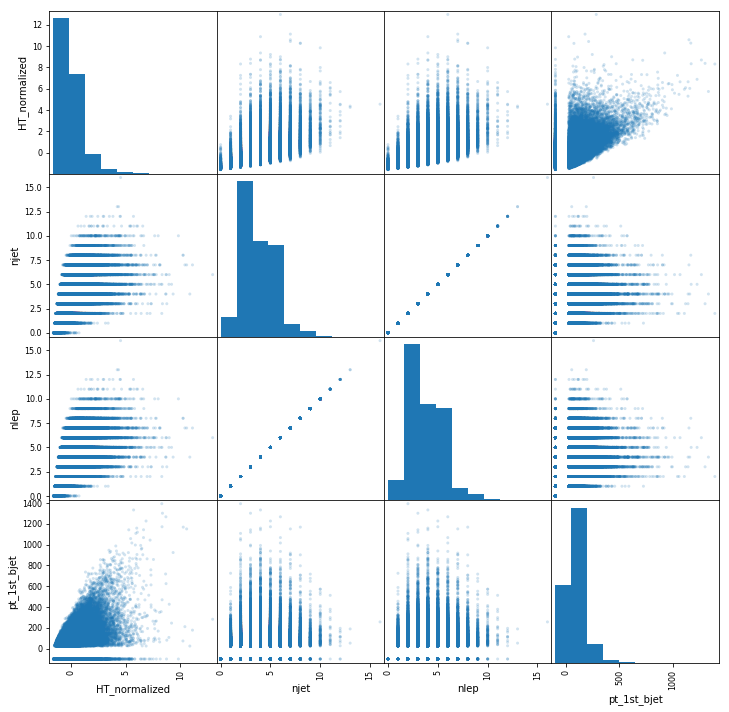

In [32]:
from pandas.plotting import scatter_matrix
df_scatter = df[['HT_normalized', 'njet', 'nlep', 'pt_1st_bjet']]
_ = scatter_matrix(df_scatter, alpha=0.2, figsize=(12, 12), diagonal='hist')